Buscar os parametros do modelo:
$$\hat(y)(t)=f(t,\theta_1,\theta_2,\theta_3,\theta_4,...,\theta_n)$$
que mininizam a função quadrática:
$$J(\theta_1,\theta_2,\theta_3,\theta_4,...,\theta_n)=\frac{1}{N}\sum\limits_{t=1}^{N}(y(t)-\hat{y}(t))^2$$

In [115]:
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt

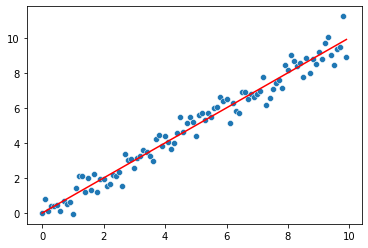

In [25]:
i = np.arange(100)*0.1
v = i;
v_ = v + np.random.normal(0, 0.5, 100)
sb.scatterplot(x=i,y=v_,markers='x');
sb.lineplot(x=i,y=v,color='red');

Seja:
$$\hat{y}(t)=\theta_a+\theta_2 e^{\theta_3 t}$$
Encontrar os valores $\theta_1,\theta_2,\theta_3$ que minizam:
$$J(\theta_1,\theta_2,\theta_3)=\frac{1}{N}\sum\limits_{t=1}^{N}(y(t)-(\theta_a+\theta_2 e^{\theta_3 t}))^2$$

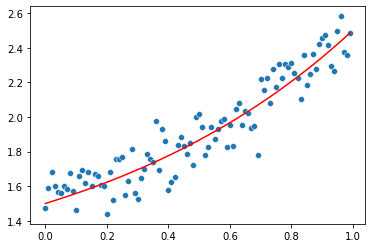

In [35]:
t = np.arange(100)*0.01
y = 1+0.5*np.exp(t*1.1);
y_ = y + np.random.normal(0, 0.1, 100)
sb.scatterplot(x=t,y=y_,markers='x');
sb.lineplot(x=t,y=y,color='red');

Minimos Quadrados Linear
$$\hat{y}(t)=\theta_0+\theta_1g_1(t)+\theta_2g_2(t)+...+\theta_ng_n(t)$$
Onde n é a ordem do modelo e $g_i(t)$ são funções apenas de t e seus valores são conhecidos.\
Exemplo:
$$\hat{y}=\theta_0+\theta_1g_1(t)$$
$$n = 1 \\
\theta_0=\theta \\
\theta_1=R \\
g_i(t)=i(t) \\
\hat{y}(t)=\hat{v}(t) \\
$$

$$\hat{y}(t) = \begin{bmatrix} 1 & g_1(t) & g_2(t) & \cdots & g_n(t)\end{bmatrix} \cdot \begin{bmatrix}\theta_1 & \theta_2 & \cdots & \theta_n\end{bmatrix}^T$$
$$\hat{y}(t)=m(t)\theta$$

Exemplo:
$$\hat{y}=\sum\limits_{i=0}^{N}\theta_i u^i(t)$$
$$\hat{y}(t) = \begin{bmatrix}1 & u(t) & u^2(t) & \cdots & u^n(t)\end{bmatrix} \cdot \begin{bmatrix}\theta_1 & \theta_2 & \cdots & \theta_n\end{bmatrix}^T$$

Quando $\hat{y}(t)=m(t)\theta$:
$$J(\theta)=\frac{1}{N}\sum\limits_{t=1}^{N}(y(t)-\hat{y}(t))^2$$
$$J(\theta)=\frac{1}{N}\sum\limits_{t=1}^{N}(y(t)-m(t)\theta)^2$$
Sendo a solução que minimiza $J(\theta)$ (solução do método dos minimos quadrados linear):
$$\theta^*=(M^TM)^{-1}M^TY$$
Onde:
$$M = \begin{bmatrix}m(1) & m(2) & \cdots & m(N)\end{bmatrix}$$
$$y = \begin{bmatrix}y(1) & y(2) & \cdots & y(N)\end{bmatrix}$$
Na prática usar:
$$\theta^*=M\backslash y$$
(Asterisco indica que é o $\theta$ que minimiza a função)

Atividade: Programa um algoritmo de identificação de sistemas capaz de estimar os parâmetros $\theta_0, \theta_1, \cdots, \theta_n$ de um modelo do tipo $\hat{y}=\sum\limits_{i=0}^{N}\theta_i u^i(t)$ onde n é um parâmetro que pode ser escolhido pelo usuário. Para testar, useo o conjunto de dados "dadps_tangente.mat".\
Passos:\
-Construir M e y\
-Calcular $\theta^*=M\backslash y$\
-Calcular $\hat{y}(t)=\sum\limits_{i=0}^{n}\theta_{i}u^i(t)$\
-Comparar graficamente $y(t)$ e $\hat(y)(t)$ 

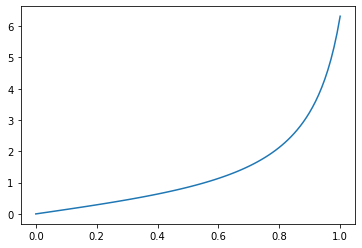

In [42]:
with open('aula_02.csv') as f:
    file = f.read()
file = file.split()
file = np.array(list(zip(*[list(map(float,x.split(','))) for x in file])))
u, y = file
sb.lineplot(x=u,y=y);

In [129]:
def lsqrt_polinomial(n, u, y):
    amostras = len(u)
    M = np.ones((amostras,n))
    for i in range(n):
        M[:,i] = u**i
    y = np.array(y)
    theta = np.linalg.inv(M.T.dot(M)).dot(M.T).dot(y)
    y_hat = np.sum(M*theta.T,axis=1)
    return y_hat

In [132]:
n = 2
y_hat = lsqrt_polinomial(n, u, y)

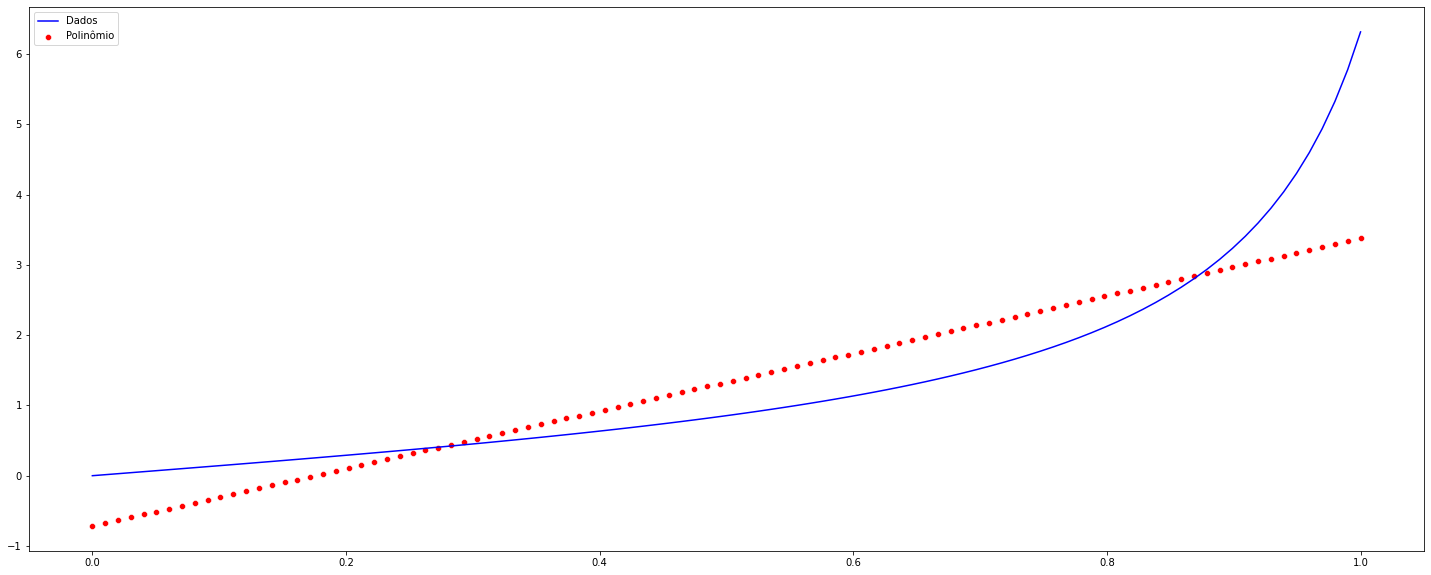

In [133]:
plt.figure(figsize = (25,10))
sb.lineplot(x=u,y=y,color='blue',label='Dados');
sb.scatterplot(x=u,y=y_hat,color='red',label='Polinômio');